# Project: Investigate a dataset project

<a id='intro'></a>
## Introduction
This is the second project in the Udacity Data Analyst Nanodegree coursework and it deals with data wrangling and data exploration to research findings and uncover valuable insights which will be helpful to answer the business question or provide solution to the problem statement. The dataset i selected for this project is "No-show appointments dataset". This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. As part of this project i would be interested to find the solution to the following question.

## Question: What are the most important characteristics or features in the data that will help to determine if a patient will show up for their scheduled appointment?


### Importing the libraries

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties: Loading the data 

In [227]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### Checking for unique values

In [228]:
data.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

### A first look at the quality of the data

In [229]:
print("The shape of the data is {}" .format(data.shape))

The shape of the data is (110527, 14)


In [230]:
# Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As we can observe from the above, there are no null or missing values in any columns.

In [231]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [232]:
# Convert PatientId from float to int datatype
data['PatientId'] = data.PatientId.astype('int64')

# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]' datatype format
data['ScheduledDay'] = data.ScheduledDay.astype('datetime64[ns]')
data['AppointmentDay'] = data.AppointmentDay.astype('datetime64[ns]')

In [233]:
# Verify the data types again
data.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [235]:
# verify and correct the column names
data = data.rename(columns={'Neighbourhood':'Neighborhood','Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMSRecieved','No-show':'NoShow'})

In [236]:
data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighborhood          81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMSRecieved            2
NoShow                 2
dtype: int64

From the observation above, there are no null values. 
<li>The column Patient ID has 62299 records which is equal to the number of rows in the dataset which means there is no       duplicate records in the dataset.</li>
<li>The column No-show has two unique values Yes and No and the columns Scholarship, Hipertension, Diabetes, Alcoholism, SMS_recieved has 2 unique values 0 and 1 whereas Handicap has values 0,1,2,3,4. </li>

### Data Cleaning

In [237]:
# Statistical summary about the data
data.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

For Age, there are 104 unique values which also has a value of -1 which is not valid and 115 which is very high for age.

In [238]:
data = data.drop(data.index[data.Age == -1])
data.shape

(110526, 14)

The row with Age = -1 value is removed from the data

In [239]:
data.PatientId.unique()

array([ 29872499824296, 558997776694438,   4262962299951, ...,
        72633149253362, 996997666245785,  15576631729893], dtype=int64)

In [240]:
data.AppointmentID.unique()

array([5642903, 5642503, 5642549, ..., 5630692, 5630323, 5629448],
      dtype=int64)

PatientId and Appointment ID have values which are randomly generated and will not be significant for our analysis in question hence these two columns can be removed from the data

In [241]:
data = data.drop(['PatientId','AppointmentID'],axis=1)

In [242]:
data.head()
data.shape

(110526, 12)

 This is the end of data cleaning process.

<a id='eda'></a>
## Exploratory Data Analysis

#### Before exloring the research questions i would like to study the relationship between different variables

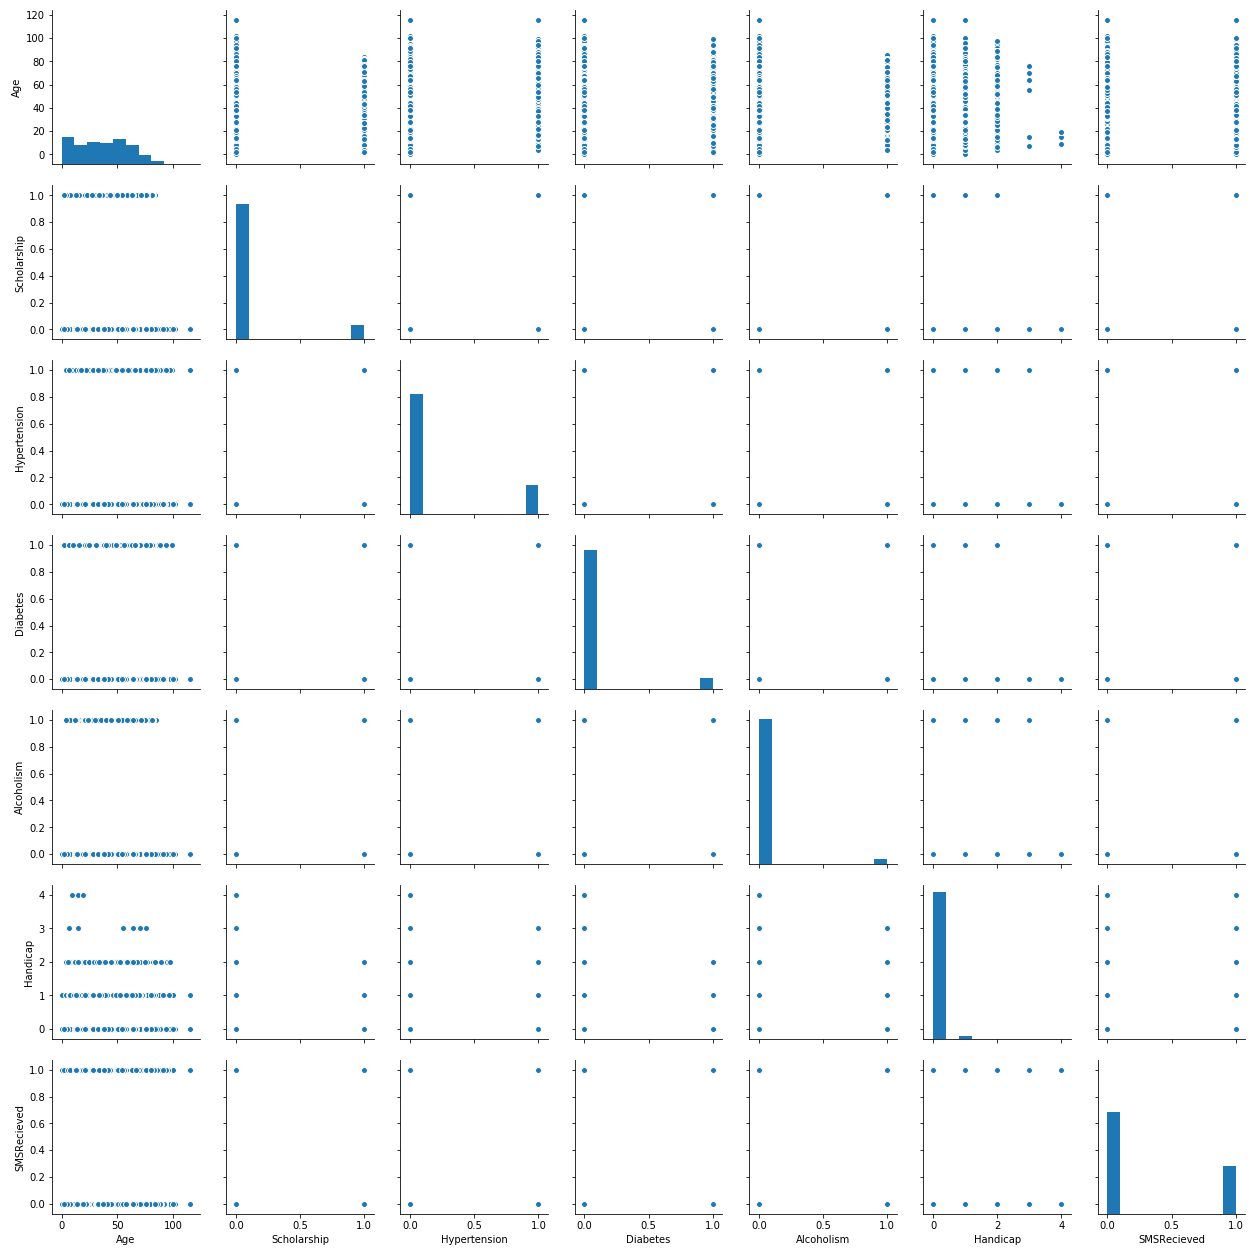

In [243]:
sns.pairplot(data);

In the above we have plotted the dataframe using seaborn pairplot() function to gain a preliminary understanding of the data types. We can see the scatter plots defining the relationship between all the variables. This plot can be very useful to identify the relationship and the corresponding data types i.e., Quantitative or Categorical. For Quantitative we can further identify if the variable is a continuous or discrete data type and for Categorical we can identify if the variable is an Ordinal or Nominal datatype.
For example, the relationship between Age and Scholarship is denoted as a scatter plot with age as continuous data type plotted against scholarship as a discrete datatype. Patients with higher age tend to recieve less scholarship than the patients with lower age.

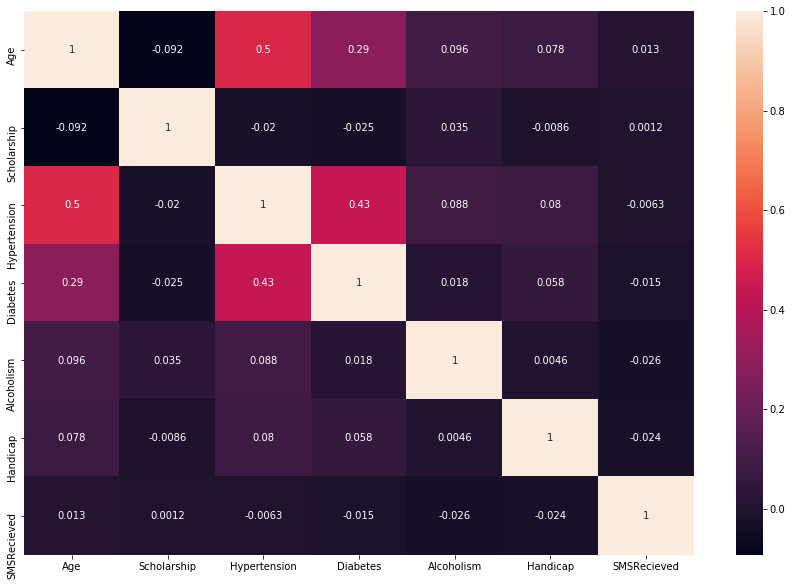

In [244]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), ax=ax, annot=True);

This Heatmap is useful to see the how correlated two variables are with each other. For example we can observe from the plot that the variables Hypertension and Age are highly positively correlated whereas the variables SMSReceived and Acoholism are highly negatively correlated.

### What is the percentage of appointments with a No show?

In [245]:
print('The total count for No show:')
data['NoShow'].value_counts(normalize=True)

The total count for No show:


No     0.798066
Yes    0.201934
Name: NoShow, dtype: float64

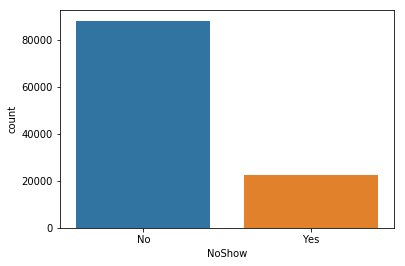

In [246]:
sns.countplot(data['NoShow']);

80% of patients did show up for their appointments and only 20% did not show up overall

### How much percentage of each gender tend to show up for their appointments?

In [247]:
# Total number of male and female count in our data
data['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [250]:
# Total number of male vs female patients who did not show up for their appointment
data[data['NoShow'] == 'Yes']['Gender'].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

As we can observe, out of the total female patients, the number of patients who did not show up for their appointment is 14594 and out of the total male patients the number of patients who did not show up for their appointment is 7725.

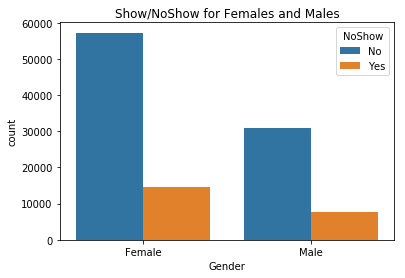

In [251]:
# overall No show percentage for Male and Female
ax = sns.countplot(x=data['Gender'],hue=data['NoShow'],data=data);
ax.set_title("Show/NoShow for Females and Males");
x_ticks_labels=['Female','Male'];
ax.set_xticklabels(x_ticks_labels);

From the above visualization we can clearly see that 'Female' patients usually have more appointments that 'Male' patients. So, Gender might be an important factor. But if we closely look at the NoShow distribution across Male's and Female's it is almost the same. So, Gender may not play an important role in determining if a patient comes for a visit or not.

### What is the influence of No Show on pateints with Hypertension, Diabetes and Alcoholism

In [252]:
Hypertension = sum(data['Hypertension'] == 1)
Diabetes = sum(data['Diabetes'] == 1)
Alcoholism = sum(data['Alcoholism'] == 1)

print('The number of patients with Hypertension is {}'.format(Hypertension))
print('The number of patients with Diabetes is {}'.format(Diabetes))
print('The number of patients with Alcoholism is {}'.format(Alcoholism))

The number of patients with Hypertension is 21801
The number of patients with Diabetes is 7943
The number of patients with Alcoholism is 3360


In [253]:
Hypertension = sum(data['Hypertension'] == 0)
Diabetes = sum(data['Diabetes'] == 0)
Alcoholism = sum(data['Alcoholism'] == 0)

print('The number of patients without Hypertension is {}'.format(Hypertension))
print('The number of patients without Diabetes is {}'.format(Diabetes))
print('The number of patients without Alcoholism is {}'.format(Alcoholism))

The number of patients without Hypertension is 88725
The number of patients without Diabetes is 102583
The number of patients without Alcoholism is 107166


In [254]:
# No show for patients with diabetes
Diabetes = data[data['Diabetes'] == 1]['NoShow']
Diabetes.value_counts()

No     6513
Yes    1430
Name: NoShow, dtype: int64

In [255]:
# No show for patients without diabetes
Diabetes = data[data['Diabetes'] == 0]['NoShow']
Diabetes.value_counts()

No     81694
Yes    20889
Name: NoShow, dtype: int64

In [256]:
# No show for patients with alcoholism
Alcoholism = data[data['Alcoholism'] == 1]['NoShow']
Alcoholism.value_counts()

No     2683
Yes     677
Name: NoShow, dtype: int64

In [257]:
# No show for patients without alcoholism
Alcoholism = data[data['Alcoholism'] == 0]['NoShow']
Alcoholism.value_counts()

No     85524
Yes    21642
Name: NoShow, dtype: int64

In [258]:
Total = len(data.index)
Hypertension_Noshow = Total/Hypertension
print('The percentage of Hypertension patients with a No show is {}'.format(Hypertension_Noshow))

The percentage of Hypertension patients with a No show is 1.2457142857142858


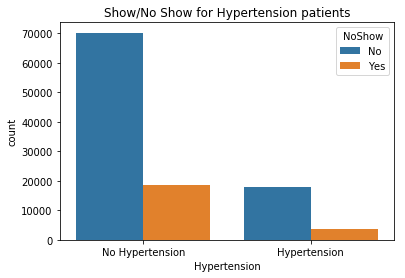

In [259]:
ax = sns.countplot(x=data.Hypertension,hue=data.NoShow,data=data);
ax.set_title('Show/No Show for Hypertension patients');
ax.set_xticklabels(labels=['No Hypertension','Hypertension']);

If we closely look at the NoShow distribution across patients with and without Hypertension it is almost the same. So, Hypertension may not play an important role in determining if a patient comes for a visit or not.

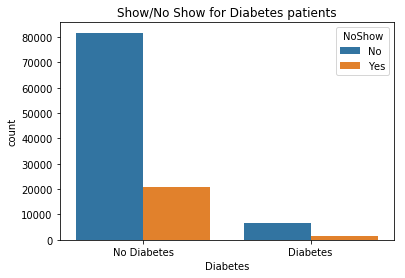

In [260]:
ax = sns.countplot(x=data.Diabetes,hue=data.NoShow,data=data);
ax.set_title('Show/No Show for Diabetes patients');
ax.set_xticklabels(labels=['No Diabetes','Diabetes']);

Fom the above visualization we can see that there are around 7943 patients with diabetes and 102583 patients without diabetes.
Among the patients with diabetes around 82% have come for the visit. On the other hand, for the patients without diabetes around 80% have come for the visit. 

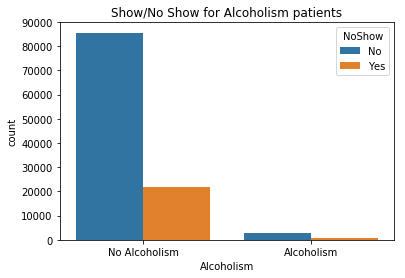

In [261]:
ax = sns.countplot(x=data.Alcoholism,hue=data.NoShow,data=data);
ax.set_title('Show/No Show for Alcoholism patients');
ax.set_xticklabels(labels=['No Alcoholism','Alcoholism']);

From the above visualization we can see that there are around 3360 patients with alcoholism and 107166 patients without alcoholism.
Among the patients with alcoholism around 80% have come for the visit. On the other hand, for the patients without alcoholism around 80% have come for the visit. 

As see from the above visualizations, there is not much influence on No Show for patients with Hyeprtension, Diabetes and Alcoholsim.

### What is the influence of SMS recieved on patients with no show?

In [262]:
Total = len(data.index)
Total

110526

In [263]:
SMS = data[data['SMSRecieved'] == 1]['NoShow']
SMS.value_counts()

No     25698
Yes     9784
Name: NoShow, dtype: int64

In [264]:
SMS = data[data['SMSRecieved'] == 0]['NoShow']
SMS.value_counts()

No     62509
Yes    12535
Name: NoShow, dtype: int64

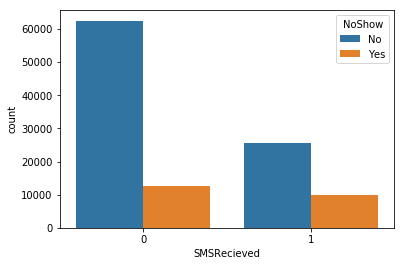

In [265]:
sns.countplot(x=data['SMSRecieved'],hue=data['NoShow'],data=data)

This is strange! Out of the total 35482 patients who recieved an SMS only 25698 patients showed up for their appointment whereas out of the total 75044 patients who did not recieve an SMS about 62509 pateints showed up for their appointment and 12535 pateints did not show up. This is usually the opposite of what usually happens. People who do recieve sn SMS usually tend to visit the hospital more than the ones who did not. 
In other words, for patients who recieved an SMS the no show percentage is 27%.

In [266]:
# It is easier to represent the NoShow with a 1 and 0 rather than yes and no
data['NoShow_binary'] = data['NoShow'].replace(('Yes','No'),(1.0,0.0))

In [267]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecieved,NoShow,NoShow_binary
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.0


### What is the influence of Age on the No Show percentage?

In [268]:
#Creating the age-bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
data['Agebins'] = pd.cut(data['Age'], bins)
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecieved,NoShow,NoShow_binary,Agebins
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.0,"(60, 65]"
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.0,"(55, 60]"
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.0,"(60, 65]"
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.0,"(5, 10]"
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.0,"(55, 60]"


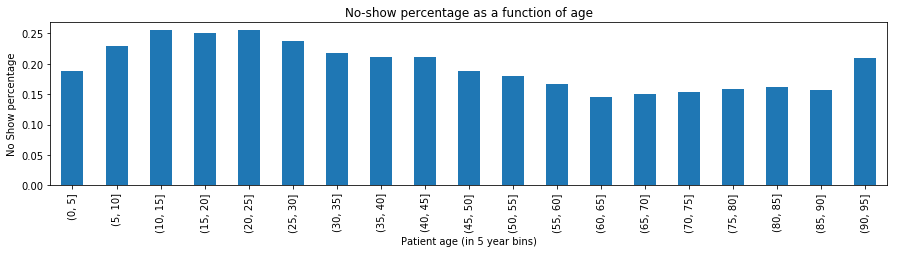

In [269]:
data_age = data[['NoShow_binary','Agebins']].groupby('Agebins').mean()
plot_title = 'No-show percentage as a function of age'
ax = data_age['NoShow_binary'].plot(kind='bar', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No Show percentage')
ax.set_xlabel('Patient age (in 5 year bins)')

Number of appointments scheduled by Gender and by Age

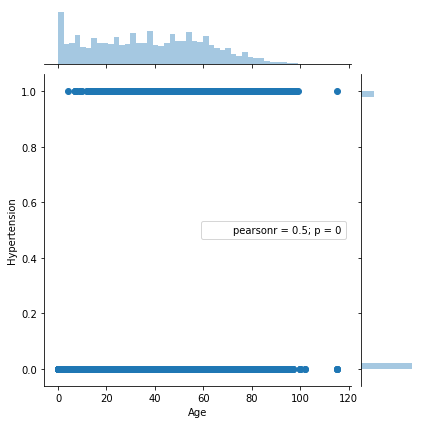

In [270]:
sns.jointplot(x=data['Age'],y=data['Hypertension'],data=data);

As we can see the above, the no show percentage is higher for the age groups 5 to 30. The peak is reached with the 10-15 bin. It then stays constant for 15 years after which the no-show percentage slowly declines until a minimum is reached at the ages of 60 - 65. Then it it remains relatively constant for 20 years.

#### Using a function to categorize the age groups and find out No Show

In [271]:
def set_age_group(x):
    """Set an age range
    """
    if x <=3:
        return 'infant',0
    elif x <=10:
        return 'child',1
    elif x <=18:
        return 'adolescent',2
    elif x <= 25:
        return 'Young Adult',3
    elif x <= 45:
        return 'Adult',4
    elif x <= 75:
        return 'Middle Aged',5
    else:
        return 'Elderly',6

In [272]:
data['Age_Range'] = data['Age'].apply(lambda x: set_age_group(x))

In [273]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecieved,NoShow,NoShow_binary,Agebins,Age_Range
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.0,"(60, 65]","(Middle Aged, 5)"
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.0,"(55, 60]","(Middle Aged, 5)"
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.0,"(60, 65]","(Middle Aged, 5)"
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.0,"(5, 10]","(child, 1)"
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.0,"(55, 60]","(Middle Aged, 5)"


In [274]:
data_ages = data.groupby(data['Age_Range'])
data_ages.NoShow.value_counts()

Age_Range         NoShow
(Adult, 4)        No        22622
                  Yes        6364
(Elderly, 6)      No         4522
                  Yes         870
(Middle Aged, 5)  No        31282
                  Yes        6267
(Young Adult, 3)  No         7262
                  Yes        2471
(adolescent, 2)   No         7558
                  Yes        2559
(child, 1)        No         7601
                  Yes        2205
(infant, 0)       No         7360
                  Yes        1583
Name: NoShow, dtype: int64

From the above we can note that the Adult group has the highest No show followed by the Middle Aged groups. The infant group has the lowest count of No Show which depicts the fact that the younger age groups tend to be more serious about their medical condition than the middle and older groups.

In [275]:
data['DayOfWeekIndex'] = data['AppointmentDay'].dt.dayofweek
data_dayofweek = data[['NoShow_binary', 'DayOfWeekIndex']].groupby('DayOfWeekIndex').mean()
data_dayofweek.head(7)

,NoShow_binary
DayOfWeekIndex,
0,0.206481
1,0.200936
2,0.196892
3,0.193541
4,0.212261
5,0.230769


Here we are denoting the days of the week as Monday = 0, Tuesday = 1 Wednesday = 3 etc. We see that there are no appointments on sunday. 

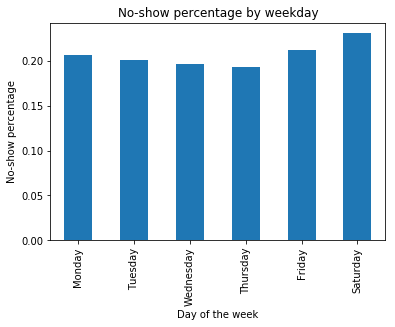

In [276]:
data_dayofweek.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plot_title = 'No-show percentage by weekday'
ax = data_dayofweek['NoShow_binary'].plot(kind='bar', title=plot_title)
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Day of the week')

From the above bar plot, we can observe that there are high chances of no shows on Friday and Saturdays compared to the rest of the week days.

### Conclusion:
For the No show appointments dataset the main question we were exploring is the following:

What are the most important characteristics or features in the data that will help to determine if a patient will show up for their scheduled appointment?



1. SMSRecieved: For patients who recieved an SMS the no show percentage is 27% vs 20% overall.

2. AppointmentDay, DayofWeekIndex: For patients with appointments on Friday and Saturday(weekend) there is high probability of No show compared t the other days of the week.

3. Age: The no-show percentage is increasing with age for young children. It stays at high peak between 10 - 25 and then gradually declines. We can also infer that Adult group has the highest No show followed by the Middle Aged group.


From the above feature importance, we could see that Gender, Age and AppointmentDay are some of the top features that would help us determine if the patient who has taken an appointment will Show/NoShow.

### Limitations

1. The data is focused on a limited population with 81 neighborhoods so it does not represent the entire population sample.
2. The data covers the time span of 3 months which might not be sufficient enough to accurately identify a No Show.
3. It would be interesting to know if the patient could cancel or reschedule their appointment.
4. It could be interesting to know the average household income of the patient.
5. It could be interesting to know the medical problem the patient is making an appointment for.